## ASSIGNMENT1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse

In [2]:
df = pd.read_excel("DS - Assignment Part 1 data set.xlsx")
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [3]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


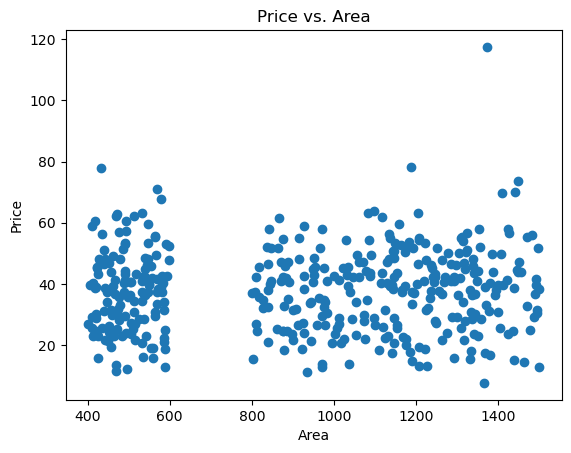

In [5]:
plt.scatter(x=df["House size (sqft)"], y=df["House price of unit area"])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs. Area");

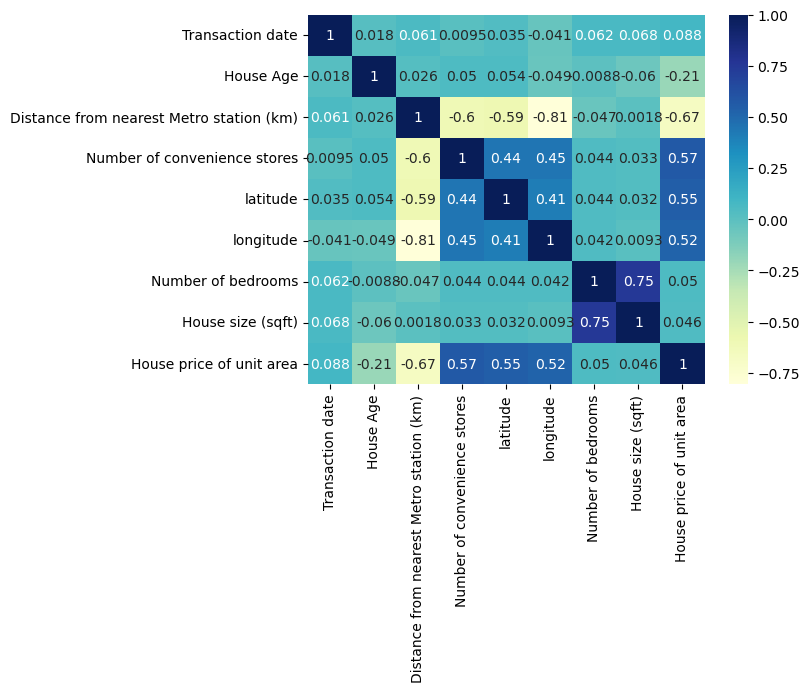

In [6]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

In [7]:
target = "House price of unit area"
y = df[target]
features =["Transaction date","House Age","Distance from nearest Metro station (km)",'Number of convenience stores',"latitude","longitude","House size (sqft)"]
X = df[features]

In [8]:
y_mean = y.mean()
y_pred_baseline = [y_mean] * len(y)
baseline_mae = mean_absolute_error(y, y_pred_baseline)
print("Mean apt price per sq ft:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean apt price per sq ft: 37.98019323671498
Baseline MAE: 10.710814721463743


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [10]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.980388158583334
Mean Squared Error: 69.24949689083032
Root Mean Squared Error: 8.321628259591407


In [11]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y1_pred = RF.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y1_pred)))

Mean Absolute Error: 4.210201923076925
Mean Squared Error: 42.1751334903846
Root Mean Squared Error: 6.494238484255456


In [12]:
knn = KNN()
knn.fit(X_train,y_train)
y2_pred = knn.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y2_pred)))

Mean Absolute Error: 5.8409615384615385
Mean Squared Error: 67.29851923076923
Root Mean Squared Error: 8.203567469751755


In [13]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y3_pred = dtr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y3_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y3_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y3_pred)))

Mean Absolute Error: 6.748076923076923
Mean Squared Error: 91.74076923076925
Root Mean Squared Error: 9.578140175982456


## ASSIGNMENT2

In [14]:
df1 = pd.read_csv("flipkart_com-ecommerce_sample.csv")
df2 = pd.read_csv("amz_com-ecommerce_sample.csv",encoding= 'unicode_escape')

In [15]:
df3 = pd.merge(df1,df2,on='product_name',how='inner')
df3

,uniq_id_x,crawl_timestamp_x,product_url_x,product_name,product_category_tree_x,pid_x,retail_price_x,discounted_price_x,image_x,is_FK_Advantage_product_x,...,pid_y,retail_price_y,discounted_price_y,image_y,is_FK_Advantage_product_y,description_y,product_rating_y,overall_rating_y,brand_y,product_specifications_y
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,SRTEH2F6HUZMQ6SJ,694,325,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
2,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,SRTEH2FVVKRBAXHB,1198,602,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,SRTEH2FVUHAAVH9X,1197,542,"[""http://img5a.flixcart.com/image/short/5/z/c/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,SRTEH2FGBDJGX8FW,990,479,"[""http://img6a.flixcart.com/image/short/q/z/v/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108331,1557321e283edce87e5417b32fe52ec4,2016-05-19 02:12:59 +0000,http://www.flipkart.com/lottie-london-perfectl...,LOTTIE LONDON PERFECTLY PRECISE,"[""Beauty and Personal Care >> Beauty Accessori...",BAREGSGXZMYSFTYV,550.0,495.0,"[""http://img6a.flixcart.com/image/brush-applic...",False,...,BAREGSGXZMYSFTYV,537,577,"[""http://img6a.flixcart.com/image/brush-applic...",False,LOTTIE LONDON PERFECTLY PRECISE (Pack of 1) Pr...,No rating available,No rating available,LOTTIE LONDON,"{""product_specification""=>[{""key""=>""Brush Type..."
108332,63319fdd48db082037bcbc0c2979c02e,2016-05-19 02:12:59 +0000,http://www.flipkart.com/lottie-london-all-eyes...,LOTTIE LONDON ALL EYES ON YOU,"[""Beauty and Personal Care >> Beauty Accessori...",BAREGTPMGGH6MB8V,550.0,495.0,"[""http://img6a.flixcart.com/image/brush-applic...",False,...,BAREGTPMGGH6MB8V,540,603,"[""http://img6a.flixcart.com/image/brush-applic...",False,LOTTIE LONDON ALL EYES ON YOU (Pac

In [16]:
df3.drop_duplicates(subset="uniq_id_x",keep='first', inplace=True)

In [17]:
df4 = df3[["product_name","retail_price_x","discounted_price_x","retail_price_y","discounted_price_y"]].reset_index(drop=True)

In [18]:
df4.rename(columns = {'retail_price_x':'Retail Price in Flipkart',"discounted_price_x":"Discounted Price in Flipkart","retail_price_y":"Retail Price in Amazon","discounted_price_y":"Discounted Price in Amazon"}, inplace = True)

In [19]:
df4

,product_name,Retail Price in Flipkart,Discounted Price in Flipkart,Retail Price in Amazon,Discounted Price in Amazon
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,982,438
1,Alisha Solid Women's Cycling Shorts,699.0,267.0,982,438
2,Alisha Solid Women's Cycling Shorts,1199.0,479.0,982,438
3,Alisha Solid Women's Cycling Shorts,1199.0,479.0,982,438
4,Alisha Solid Women's Cycling Shorts,999.0,379.0,982,438
...,...,...,...,...,...
16711,LOTTIE LONDON PERFECTLY PRECISE,550.0,495.0,537,577
16712,LOTTIE LONDON ALL EYES ON YOU,550.0,495.0,540,603
16713,LOTTIE LONDON MAKE ME BLUSH,850.0,765.0,848,943
16714,NYN 80158,869.0,199.0,856,229
